In [1]:
%load_ext tikzmagic
%matplotlib inline

# 회귀분석

어떤 수치형 변수의 값이 다른 변수의 값에 의해 어떻게 영향을 받는지를 분석하는 방법을 <b>회귀분석(regression analysis)</b>이라고 한다. 

회귀분석을 하려면 영향을 주는 변수들과 영향을 받는 변수가 무엇인지를 결정해야 한다. 회귀분석에서 분석의 대상이 되는 수치형 변수를 <b>종속변수(independent variable)</b>라 하고 그 종속변수에 영향을 주는 다른 변수들을 <b>독립변수(dependent variable)</b>라 한다. 보통 종속변수는 $y$ 기호로 나타내고 독립변수는 $x$ 기호로 나타낸다. 독립변수가 여러개 있을 때는 $x_1, x_2, \ldots, x_K$ 등으로 아랫첨자를 이용하여 표시한다.

회귀분석에서 종속변수와 독립변수의 관계는 다음과 같은 다이어그램으로 표현할 수 있다. 화살표는 변수간의 관계를 나타내는 것으로 독립변수에서 종속변수를 향하는 방향으로 그린다. 

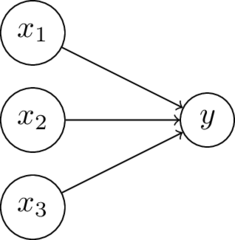

In [2]:
%%tikz
\node[draw,circle] (x1) at (0,2) {$x_1$};
\node[draw,circle] (x2) at (0,1) {$x_2$};
\node[draw,circle] (x3) at (0,0) {$x_3$};
\node[draw,circle] (y) at (2,1) {$y$};
\draw[->] (x1)--(y);
\draw[->] (x2)--(y);
\draw[->] (x3)--(y);

## 회귀분석 문제의 예

팁 데이터에서 전체 지불금액(total_bill)과 팁 금액(tip)을 2차원 스캐터플롯(scatter plot)으로 나타내면 다음과 같다. 이 그래프에서는 하나의 점이 하나의 고객그룹 즉, 하나의 레코드를 표시한다. 

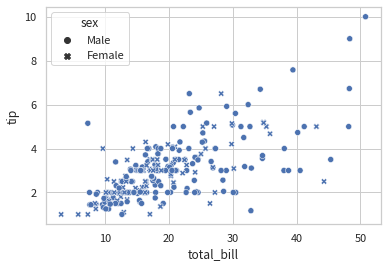

In [3]:
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(data=tips, x="total_bill", y="tip", style="sex")
plt.show()

이 그래프를 보면 지불금액이 증가한 경우에는 팁도 같이 증가하는 것처럼 보인다. 우리가 관심을 가지는 것은 지불금액이 증가할 때 팁 금액은 어느 정도 증가하는지이다.

이 문제를 회귀분석 문제로 보고 분석하기위해 다음과 같이 독립변수와 종속변수를 정한다.

* 독립변수 : 지불금액, 성별
* 종속변수 : 팁금액

이 회귀분석을 통해 다음과 같은 질문들에 대한 답을 얻을 수 있다. 

* 지불금액이 증가할 때 정말 팁이 증가하는가?
* 지불금액이 1 달러만큼 증가할 때 팁은 어느 정도 증가하는가?
* 성별이 달라지면 팁이 증가하는가?



## 회귀분석의 예

위와 같은 회귀분석 문제는 여러가지 방법으로 풀 수 있다. 다음은 선형회귀분석이라는 방법으로 위 문제를 푸는 코드를 보여주고 있다. 
문제를 풀면 코드의 출력과 같은 형식의 정보가 표시된다. 회귀분석 문제를 푼다는 것은 이 정보를 제대로 읽고 해석하는 과정을 포함한다.

In [4]:
import statsmodels.formula.api as smf

m = smf.ols('tip ~ total_bill + C(sex)', data=tips)
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           1.18e-32
Time:                        15:31:09   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9067      0.175  

위 회귀분석 결과를 해석하면 다음과 같은 결론을 얻을 수 있다. 

* 지불금액이 증가할 때 팁도 증가한다.
* 지불금액이 1달러만큼 증가할 때 팁은 약 0.1달러 정도 증가한다.
* 성별은 팁 금액에 영향을 주지 않는다.

위의 결과에서 이러한 정보를 읽고 해석하는 방법은 다음 절부터 차근차근 설명하도록 한다. 